<a href="https://colab.research.google.com/github/elenachau/machine-learning/blob/main/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Dataset**

The dataset choosen for this experiment is  Wisconsin Breast Cancer data to detect malignant cells.The dataset has 569 samples and 31 columns.

- `radius`: The mean of distances from the center of the nucleus to points on the perimeter.
- `texture_mean`: Standard deviation of gray-scale values.
- `perimeter": The perimeter (circumference) of the tumor.
- `area`: The area of the tumor.
- `smoothness`: A measure of local variation in radius lengths.
- `compactness`: A measure of how compact the shape of the tumor is.
- `concavity`: Severity of concave portions of the contour.
- `concave points`: Number of concave portions of the contour.
- `symmetry`: Symmetry of the tumor.
- `fractal_dimension`: A measure of the complexity of the tumor boundary.
- `Diagnosis (Class)`: This is the target variable that indicates the diagnosis of the tumor. It has two classes:
    - `M` for malignant (cancerous)
    - `B` for benign (non-cancerous)

Here's a breakdown of the column types:

- 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1' likely correspond to one set of measurements.
- 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2' may correspond to another set of measurements.
- 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3' appear to be a third set of measurements.

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
data = pd.concat([breast_cancer_wisconsin_diagnostic.data.features, breast_cancer_wisconsin_diagnostic.data.targets], axis=1)

data.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [ ]:
data['Diagnosis'].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: Diagnosis, dtype: float64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

Predict the patients in the testdata as malignant or benign using all the attributes/features with K = 5 and Euclidean distance; identify accuracy (as percentage) on the test data.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

features = data.drop(['Diagnosis'], axis=1)
target = data['Diagnosis']

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)

y_test_pred = knn.predict(x_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)}")

Test Accuracy: 0.9590643274853801


Repeat (creating random partitions and evaluating the performance) 5 times.

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, x_train, y_train, cv=5) #cross validation
scores

array([0.9125    , 0.9       , 0.95      , 0.88607595, 0.92405063])

In [ ]:
scores.mean()

0.9145253164556962

Vary K from 3 to 11 and find the best K.

In [ ]:
import matplotlib.pyplot as plt

train_acc = []
test_acc = []

for k in range(3,12):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)

  y_train_pred = knn.predict(x_train)
  y_test_pred = knn.predict(x_test)

  train_acc.append(accuracy_score(y_train, y_train_pred))
  test_acc.append(accuracy_score(y_test, y_test_pred))

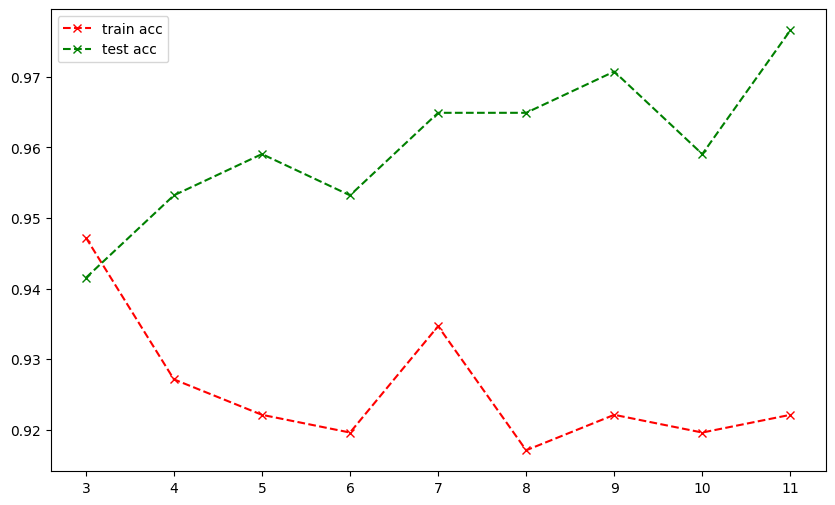

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(3,12), train_acc, 'rx--')
plt.plot(range(3,12), test_acc, 'gx--')
plt.legend(['train acc', 'test acc'])
plt.show()

Calculate accuracy score

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

print(f"Best test accuracy: {accuracy_score(y_test, y_test_pred)}")

Best test accuracy: 0.9766081871345029


Calculate confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_pred))

[[107   1]
 [  3  60]]


Calculate precision score

In [ ]:
from sklearn.metrics import precision_score

print(precision_score(y_test, y_test_pred, pos_label='M')) #positive label is malignant

0.9836065573770492


Calculate recall score

In [ ]:
from sklearn.metrics import recall_score

print(recall_score(y_test, y_test_pred, pos_label='M'))

0.9523809523809523


Apply Logistic regression on the dataset and report confusion matrix, precision, recall, accuracy score and roc-auc curve

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=2400)
lr.fit(x_train, y_train)

y_test_pred = lr.predict(x_test)

In [ ]:
print(f"Confusion matrix: \n{confusion_matrix(y_test, y_test_pred)}\n")
print(f"Precision score: {precision_score(y_test, y_test_pred, pos_label='M')}\n")
print(f"Recall score: {recall_score(y_test, y_test_pred, pos_label='M')}\n")
print(f"Accuracy score: {accuracy_score(y_test, y_test_pred)}\n")

Confusion matrix: 
[[106   2]
 [  2  61]]

Precision score: 0.9682539682539683

Recall score: 0.9682539682539683

Accuracy score: 0.9766081871345029



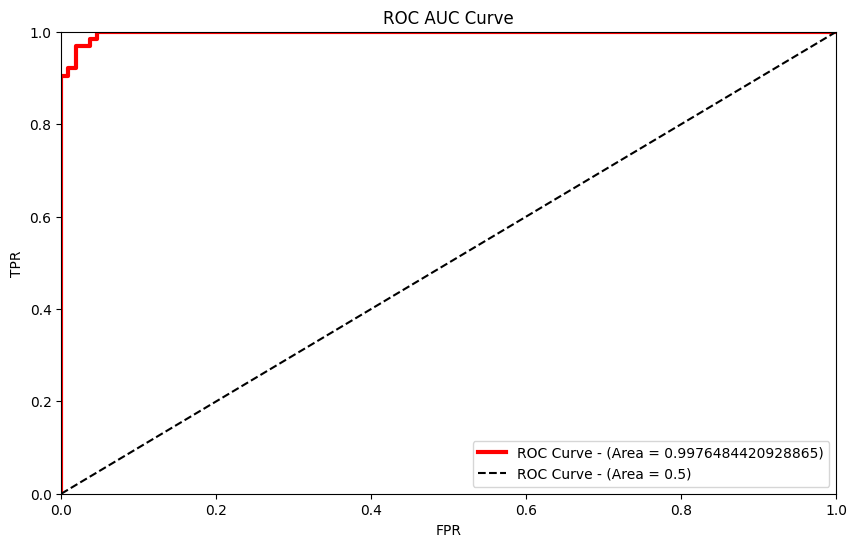

In [ ]:
from sklearn.metrics import roc_curve, auc

y_test_pred_probs = lr.predict_proba(x_test)

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_probs[:,1], pos_label='M') #[:,] indicates column
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='red', lw=3, label=f'ROC Curve - (Area = {roc_auc})')
plt.plot([0,1], [0,1], 'k--', label=f'ROC Curve - (Area = 0.5)')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()